#  Time-series weather temperature prediction using advanced neuron network

## 1.1 Introduction

Prediction of time-series data is challenging as the temporal patterns are usually difficult to discover by machine. For example, the temperature of 9 am today tends to be similar to the temperature at the same time tomorrow. However, such common sense is easy for humans while very difficult for a machine to discover. The common-sense heuristic is just one model among millions that can be represented in our hypothesis space, which, just like looking for a needle in a haystack because a good solution that technically exists in your hypothesis space does not mean you will be able to find it via gradient descent(Chollet, 2021, p290).

In this project, we will tackle the problem of time-series analysis and, specifically, predicting the temperatures based on the Jena dataset. The Jena dataset consists of weather data collected from 2009 to 2016 in the city of Jena, Germany, in a sequence of times. The dataset has many features, such as temperature, humidity, and wind speed.

We aim to solve this problem of time-series temperature prediction by deep learning neuron networks. We will first evaluate several simple models which have some predictive power. And then build a more advanced neuron network model with more capability to give a better prediction. We will demonstrate the effectiveness of an advanced neural network architecture for time-series forecasting and how the optimal model could be found.

## 1.2 Aims and objectives

This project aims to develop an advanced neural network model to predict temperature based on the Jena weather dataset. We assume that different features extracted from different types of neuron network structures could be informative to the prediction. Higher accuracy could be achieved by leveraging features extracted from dense layers, Convolutional 1D layers, and Gated Recurrent Units (GRU) layers.

Objectives include:

1. Collect and preprocess the Jena weather dataset into machine-accessible form.
2. Build and evaluate a baseline model to predict temperature after 24 hours.
3. Build and evaluate simple models using dense layers, Convolutional 1D layers, and Gated Recurrent Units (GRU) separately.
4. Build, evaluate, and develop an advanced model consisting of features concatenated of the features from the above simple layers feature extraction.
5. Conduct hyperparameter tuning for the advanced model to explore the optimal hyperparameters which give the best performance.
6. Build and evaluate an optimized advanced model, and compare it with the baseline and simple models' performance.


## 1.3 Methodology

### 1.3.1 The neuron network model 

To get a more accurate prediction of temperature based on the historical data, we need to explore which kind of neuron network architecture gives the best performance. Dense layers, convolutional layers, and recurrent networks learn data patterns in different ways. We assume information extracted from different approaches could contribute to the learning of data patterns. Hence, firstly, we will build simple models of each approach to see how the simple models extract information. Then, we will develop an advanced model to combine the information extracted from these models. After that, we will tune for an optimal model which extracts the most information by evaluating performance leveraging hyperparameters of types of layers, number of layers, number of neurons, and so on.

The working process is as follows:
1. Data collection and preparation: We will collect the Jena weather dataset, normalize it, and split it into training, validation, and testing sets based on the timeline.
2. Build a baseline model: We will build a simple baseline model that predicts the temperature the same as the temperature after 24 hours.
3. Build and evaluate a simple dense model.
4. Build and evaluate a simple Convolutional 1D model.
5. Build and evaluate a simple Gated Recurrent Units (GRU) model.
6. Build and evaluate an advanced model consisting of the above simple models.
7. Develop and evaluate the advanced model for a bigger capacity. This will provide clues to build hyperparameter space.
8. Tune the hyperparameters and build an optimal model.
9. Build and evaluate the optimal model.
10. Summarize results. We will compare the performance of our advanced model with other built models to evaluate its effectiveness in predicting temperature based on the Jena weather dataset.


### 1.3.2 The measure of success

In this project, we aim to build an advanced neuron network that can extract the most information from time-series data. Hence, the model could predict temperature accurately. Such accuracy could be measured by both Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics. The gradient of MSE is smooth around zero, making it easier for the optimization algorithm to converge to a good solution. Hence, we will use MSE as our loss. To get a more comprehensive result, we will use MAE as our metric, as the scale is the same as the real temperature data. 

### 1.3.3 Deciding on an evaluation protocol

Due to the temporal nature of our time series data, we will split the dataset into training, validation, and testing sets based on a timeline. However, as we only have limited computational resources, we are not able to evaluate complex models on the whole dataset. Hence, we will use the second last 100,000 samples as the training dataset, the following 50,000 samples as the validation dataset, and the last 50,000 samples as the test dataset.

We will use hold-out validation as our evaluation method as our sample size is big. The validation data will be used to evaluate the performance of different models during training and hyperparameter tuning. We will compare the performance of different models based on the MAE values on the unseen test dataset. 

## 1.4 Implementation

With the above-mentioned aims and methodology, we can move on to the implementation details of building and evaluating different neuron network models for temperature prediction. We will start with data collection and preparation. Followed by a baseline model and simple model evaluation. Having knowledge about simple models, we will develop some advanced neuron network models to leverage different information capabilities from feature extraction approaches by dense layers, conv1D layers, and GRU layers. With the knowledge learned from all the advanced models, we can start a hyperparameter space and tune for an optimal model.

### 1.4.1 Data collection and preparation

Data is critical part in a machine learning project. In this project, we will use the famous Jena weather dataset. We will demonstrate the process of collecting and preparing the Jena weather dataset, which could be used to develop our models for temperature prediction, in this section.

The Jena weather dataset contains 14 features, such as temperature, pressure, and wind speed,  collected in the city of Jena, Germany, from the 1st of January 2009 to the 31st of December 2016. 

We first download the Jena weather data and then transform it into a format which machine-readable. We only slice a small part of data for training, validation, and testing due to limited computational resources. 

#### 1.4.1.1 Import libraries and define fuctions

In [1]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
def plot_history(history):
    """
    plot model training loss and validation loss against training epochs in a subplot; 
    plot model training MAE and validation MAE against training epochs in another subplot
    
    Parameters
    ----------
    history: object
             model history callback object.
    
    """
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(2,figsize = (6,6))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    
    # training loss and validation loss values
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # training mae and validation mae values
    mae = history.history["mae"]
    val_mae = history.history["val_mae"]
    epochs = range(1, len(loss) + 1) # epochs run
    
    # plot loss curve
    axs[0].plot(epochs, loss, "bo", label = "Training MSE")
    axs[0].plot(epochs, val_loss, "b", label = "Validation MSE")
    axs[0].set_title("Training and validation MSE")
    axs[0].legend(loc="upper right")
    axs[0].grid()
    
    # plot mae curve
    axs[1].plot(epochs, mae, "bo", label = "Training MAE")
    axs[1].plot(epochs, val_mae, "b", label = "Validation MAE")
    axs[1].set_title("Training and validation MAE")
    
    axs[1].legend(loc="upper right")
    axs[1].grid()
    plt.show()


In [3]:
# Sets all random seeds for the program (Python, NumPy, and TensorFlow) to make models reproductive
# randomness from GPU cuDNN ops are uncontrolled
tf.keras.utils.set_random_seed(268)

#### 1.4.1.2 Import the data sets

In [4]:
# need download data, unzip and save the csv file in current working folder. 
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip

def get_data(filename):
    """
    Create numpy array of raw data and target temperature data from input csv file
    
    Parameters
    ----------
    filename: csv file of jena weather dataset
    
    Returns
    -------
    temperature : numpy array
                  the temperature data extracted from jena csv file
    raw_data    : numpy array
                  the raw data(removed header and 1st date column) extracted from jena dataset.    
    """
    import numpy as np
    import os
    fname = os.path.join(filename)
    with open(fname) as f:
        data = f.read()
        lines = data.split("\n")
        header = lines[0].split(",")
        lines = lines[1:]
        
    temperature = np.zeros((len(lines),))
    raw_data = np.zeros((len(lines), len(header) - 1))
    for i, line in enumerate(lines):
        values = [float(x) for x in line.split(",")[1:]]
        temperature[i] = values[1]
        raw_data[i, :] = values[:]
    return temperature, raw_data

# code reference from ((Chollet, 2021, p290))

In [5]:
# get features and targets
temperature, raw_data = get_data("jena_climate_2009_2016.csv")

In [6]:
# check missing values in data
print("missing values in temperature: ", np.isnan(temperature).sum(), "\nmissing values in raw data: ", np.isnan(raw_data).sum())


missing values in temperature:  0 
missing values in raw data:  0


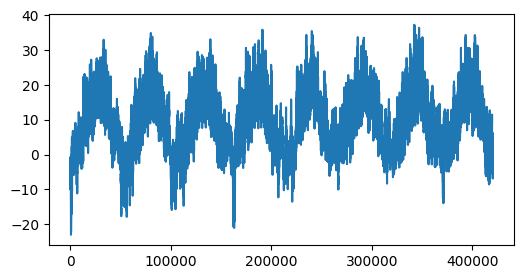

In [7]:
# visualize temperature distribution
plt.figure(figsize=(6,3))
plt.plot(range(temperature.shape[0]), temperature)

#### 1.4.1.3 Create datasets for training, validation and testing

From the above plot, we found that temperature changes followed a periodic trend. Hence, our models may also be capable to learn those patterns on a smaller slice of data if those models have enough capability. As the data size is too big and we do not have enough computational resources, we will only use latest 100,000 as training dataset, subsequent 50,000 as validation dataset and last 50,000 as test dataset.


In [8]:
# number of training, validation, testing samples
data = raw_data[-200000:]
temperature = temperature[-200000:]
num_train_samples = 100000
num_val_samples = 50000
num_test_samples = 50000


# normalize dataset 
scaler = MinMaxScaler()

# train scaler
scaler.fit(data[:num_train_samples])

scaler_min_temp = scaler.data_min_[1]
scaler_scale_temp = scaler.data_max_[1] - scaler.data_min_[1]

print("min temperature seen in training data: ", scaler.data_min_[1] )
print("max temperature seen in training data: ", scaler.data_max_[1] )
print("temperature scaler scale: ", scaler_scale_temp )

# transform the whole dataset
data = scaler.transform(data)

print("shape of raw data: ", raw_data.shape)
print("shape of selected data: ", data.shape)

min temperature seen in training data:  -13.51
max temperature seen in training data:  35.48
temperature scaler scale:  48.989999999999995
shape of raw data:  (420451, 14)
shape of selected data:  (200000, 14)


In [9]:
# generate training dataset, validation dataset and testing dataset

sampling_rate = 6 
window = 120
delay = sampling_rate * (window + 24 - 1)

batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
  data[:-delay],
  targets = temperature[delay:],
  sampling_rate = sampling_rate,
  sequence_length = window,
  shuffle = True,
  batch_size = batch_size,
  start_index = 0,
  end_index = num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
  data[:-delay],
  targets = temperature[delay:],
  sampling_rate = sampling_rate,
  sequence_length = window,
  shuffle = True,
  batch_size = batch_size,
  start_index = num_train_samples,
  end_index = num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
  data[:-delay],
  targets = temperature[delay:],
  sampling_rate = sampling_rate,
  sequence_length = window,
  shuffle = True,
  batch_size = batch_size,
  start_index = num_train_samples + num_val_samples
)

# code reference (Chollet, 2021, p287)

In [10]:
test_labels = np.concatenate([batch_of_targets for batch_of_sequences, batch_of_targets in test_dataset])

### 1.4.2 Baseline Model Development and Evaluation 

The baseline model is an important parameter to evaluate machine learning models performance. In our dataset, it is easy for human to predict the  temperature of a point in time on a given day will be similar to that of the same point in time on the following day. Despite such pattern could be difficult for machine to discover, our models that could  surpass the baseline are capable to discover patterns and have statistical power. 

Throughout this project, we will compare the performance of our other models by the percentage of improvement over the baseline.


In [11]:
# evaluate Common sense model
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        # unscale the predition temperature
        preds = samples[:, -1, 1]*scaler_scale_temp+scaler_min_temp
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

# code reference (Chollet, 2021, p288)

In [12]:
# evaluate common sense model
val_score_common_sense = evaluate_naive_method(val_dataset)
print("common sense model MAE on validation dataset: ", val_score_common_sense)

test_score_common_sense = evaluate_naive_method(test_dataset)
print("common sense model MAE on test dataset: ", test_score_common_sense)

common sense model MAE on validation dataset:  2.8079353097542654
common sense model MAE on test dataset:  2.4601168866034744


### 1.4.3 Dense Model Development and Evaluation

The first simple model we will built is a dense neural network, which consist of single fully connected layer with ReLU activation functions. The input data will be flattened into a 1D array, and pass to the fully connected layer. The output layer will use a linear activation function to produce a single continuous value as the predicted temperature. We will use MSE in loss function as it gives smooth values near zero and helps model to backpropogate. At the same time, we use MAE as optimization metrics as it easy to understand due to the same scale with unit scale. The MAE score on test dataset will be compared with other models

In [13]:
# define model architecture
inputs = layers.Input(shape=(window, data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation = "relu")(x)
outputs = layers.Dense(1)(x)
model_Dense = keras.Model(inputs, outputs)

# save best performed model during training
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only = True)
]

# define model optimisation algorithm
model_Dense.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [14]:
# train the model
history_Dense = model_Dense.fit(
    train_dataset,
    epochs = 20,
    validation_data = val_dataset,
    callbacks = callbacks
)

Epoch 1/20
388/388 [==============================] - 9s 16ms/step - loss: 19.2147 - mae: 3.3562 - val_loss: 14.9685 - val_mae: 3.0793
Epoch 2/20
388/388 [==============================] - 6s 15ms/step - loss: 11.3446 - mae: 2.6270 - val_loss: 13.5486 - val_mae: 2.9232
Epoch 3/20
388/388 [==============================] - 6s 16ms/step - loss: 10.2614 - mae: 2.4884 - val_loss: 12.6988 - val_mae: 2.8120
Epoch 4/20
388/388 [==============================] - 6s 16ms/step - loss: 9.7216 - mae: 2.4192 - val_loss: 12.3039 - val_mae: 2.7636
Epoch 5/20
388/388 [==============================] - 6s 16ms/step - loss: 9.4623 - mae: 2.3865 - val_loss: 12.4197 - val_mae: 2.7962
Epoch 6/20
388/388 [==============================] - 6s 16ms/step - loss: 9.2106 - mae: 2.3522 - val_loss: 12.1684 - val_mae: 2.7375
Epoch 7/20
388/388 [==============================] - 6s 16ms/step - loss: 9.0492 - mae: 2.3300 - val_loss: 11.9864 - val_mae: 2.7224
Epoch 8/20
388/388 [==============================] - 6s 16

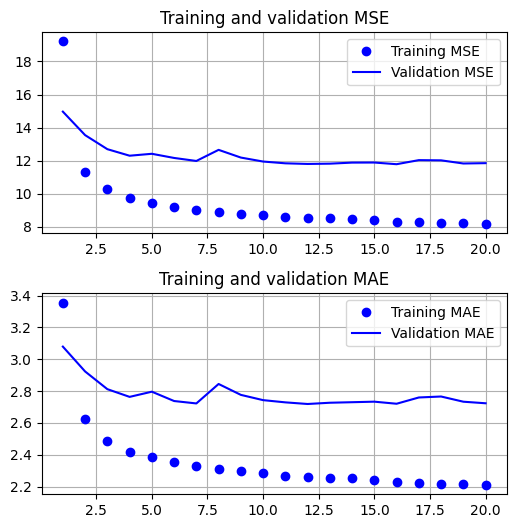

In [15]:
# plot model performance during training
plot_history(history_Dense)

In [16]:
# print out best model performance based on validation dataset
best_score_dense = min(history_Dense.history['val_mae'])
print("best val_mae dense: ",best_score_dense)

best val_mae dense:  2.7189040184020996


In [17]:
# load best performed model during training
loaded_model_dense = keras.models.load_model("jena_dense.keras")

# predict Apple Inc daily Close price on test dataset
dense_pred = loaded_model_dense.predict(test_dataset).squeeze()

# evaluate model performance on test dataset
best_test_score_dense = loaded_model_dense.evaluate(test_dataset)[1]
print("best test score Dense: ", best_test_score_dense)

# improvement percentage comparing to baseline model
improvement_dense = ((test_score_common_sense - best_test_score_dense)/test_score_common_sense)*100
print(f"Improvement_Dense = {improvement_dense:.2f} %")


190/190 [==============================] - 2s 11ms/step - loss: 9.1410 - mae: 2.3958
best test score Dense:  2.3957738876342773
Improvement_Dense = 2.62 %


### 1.4.4 Convolutional 1D Model Development and Evaluation

Next, we will develop a 1D convolutional neural network (Conv1D) model. The model consists of a single 1D convolutional layer, which will extract local features from the input time-series data. The features will then be passed through a flattened layer and an output layer to generate a single continuous value as the predictions of temperature values.

In model training, we will use the mean squared error (MSE) loss function and, at the same time, monitor the MAE metric. Similarly, we will compare the performance of the Conv1D model by the percentage of improvement over the baseline.

In [17]:
# define model architecture
inputs = keras.Input(shape=(window, data.shape[-1])) #input layer
x = layers.Conv1D(16, 4, activation="relu")(inputs) # Convolutional layer
x = layers.Flatten()(x) 
outputs = layers.Dense(1)(x)
model_1D = keras.Model(inputs, outputs)

model_1D.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 conv1d (Conv1D)             (None, 117, 16)           912       
                                                                 
 flatten_1 (Flatten)         (None, 1872)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1873      
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [18]:
# save model with best performance
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_Conv1D.keras", save_best_only = True)
            ]

# define model optimisation algorithm
model_1D.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

# train model
history_1D = model_1D.fit(
    train_dataset,
    epochs = 20,
    validation_data = val_dataset,
    callbacks = callbacks
)

Epoch 1/20
388/388 [==============================] - 4s 7ms/step - loss: 19.0476 - mae: 3.2467 - val_loss: 14.0405 - val_mae: 2.9701
Epoch 2/20
388/388 [==============================] - 3s 7ms/step - loss: 10.6499 - mae: 2.5364 - val_loss: 13.2073 - val_mae: 2.8686
Epoch 3/20
388/388 [==============================] - 3s 7ms/step - loss: 9.9348 - mae: 2.4473 - val_loss: 12.7865 - val_mae: 2.8018
Epoch 4/20
388/388 [==============================] - 3s 7ms/step - loss: 9.5567 - mae: 2.4018 - val_loss: 12.4812 - val_mae: 2.7729
Epoch 5/20
388/388 [==============================] - 3s 7ms/step - loss: 9.3228 - mae: 2.3746 - val_loss: 12.4415 - val_mae: 2.7671
Epoch 6/20
388/388 [==============================] - 3s 7ms/step - loss: 9.1311 - mae: 2.3504 - val_loss: 12.2681 - val_mae: 2.7428
Epoch 7/20
388/388 [==============================] - 3s 7ms/step - loss: 8.9830 - mae: 2.3331 - val_loss: 12.0724 - val_mae: 2.7328
Epoch 8/20
388/388 [==============================] - 3s 7ms/step -

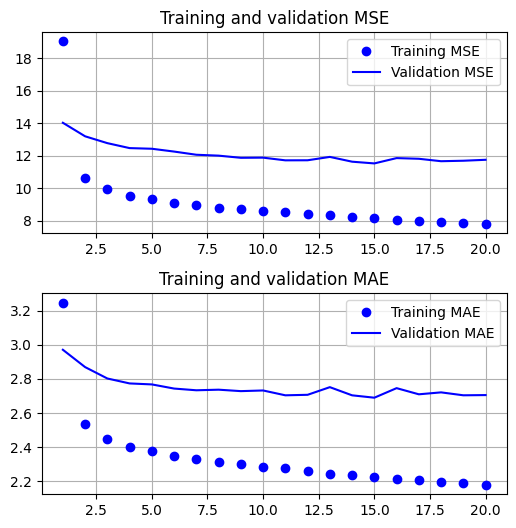

In [19]:
plot_history(history_1D)

In [20]:
best_score_1D = min(history_1D.history['val_mae'])
print("best validation MAE score: ", best_score_1D)

# load pretrained model
loaded_model_1D = keras.models.load_model("jena_Conv1D.keras")

# evaluate loaded model
best_test_score_1D = loaded_model_1D.evaluate(test_dataset)[1]
print(
    "best test MAE score: ", best_test_score_1D)

# comparing model performance with common sense model
improvement_1D = ((test_score_common_sense - best_test_score_1D)/test_score_common_sense)*100
print(f"Improvement_1D = {improvement_1D:.2f} %")

best validation MAE score:  2.6893160343170166
190/190 [==============================] - 1s 4ms/step - loss: 9.0845 - mae: 2.3916
best test MAE score:  2.3916175365448
Improvement_1D = 2.78 %


### 1.4.5 GRU Model Development and Evaluation

The third simple model will be a Gated Recurrent Unit (GRU) model. We will build a GRU model with a single GRU layer with a ReLU activation function followed by an output layer. The GRU layer will capture long-term temporal patterns in the input time-series data and produce a single continuous value of temperature predictions. Same as above, we will compare the percentage of improvement over the baseline model on the test dataset using MAE scores.

In [21]:
inputs = keras.Input(shape=(window, data.shape[-1]))
x = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(x)
model_GRU = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_GRU.keras", save_best_only = True)
]
model_GRU.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

history_GRU = model_GRU.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/20
388/388 [==============================] - 6s 13ms/step - loss: 76.3788 - mae: 7.0466 - val_loss: 59.2993 - val_mae: 6.1724
Epoch 2/20
388/388 [==============================] - 5s 13ms/step - loss: 34.2301 - mae: 4.4893 - val_loss: 24.7531 - val_mae: 3.6234
Epoch 3/20
388/388 [==============================] - 5s 13ms/step - loss: 15.6920 - mae: 2.9626 - val_loss: 17.6837 - val_mae: 3.1035
Epoch 4/20
388/388 [==============================] - 5s 13ms/step - loss: 12.1499 - mae: 2.6457 - val_loss: 15.1578 - val_mae: 2.9262
Epoch 5/20
388/388 [==============================] - 5s 13ms/step - loss: 10.7994 - mae: 2.5181 - val_loss: 13.9054 - val_mae: 2.8456
Epoch 6/20
388/388 [==============================] - 5s 13ms/step - loss: 10.1358 - mae: 2.4548 - val_loss: 13.1842 - val_mae: 2.7996
Epoch 7/20
388/388 [==============================] - 5s 13ms/step - loss: 9.7401 - mae: 2.4156 - val_loss: 12.7415 - val_mae: 2.7750
Epoch 8/20
388/388 [==============================] - 5s

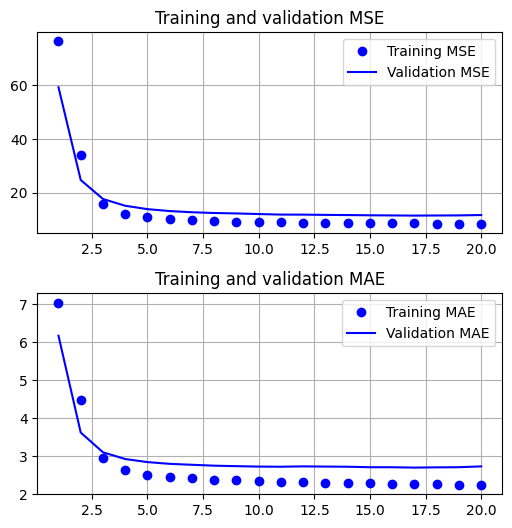

In [22]:
plot_history(history_GRU)

In [23]:
best_score_GRU = min(history_GRU.history['val_mae'])
print("best validation MAE score: ", best_score_GRU)

# load pretrained model
loaded_model_GRU = keras.models.load_model("jena_GRU.keras")

# evaluate loaded model
best_test_score_GRU = loaded_model_GRU.evaluate(test_dataset)[1]
print("best test MAE score: ", best_test_score_GRU)

# comparing model performance with common sense model
improvement_GRU = ((test_score_common_sense - best_test_score_GRU)/test_score_common_sense)*100
print(f"Improvement_GRU = {improvement_GRU:.2f} %")

best validation MAE score:  2.700849771499634
190/190 [==============================] - 2s 7ms/step - loss: 8.9939 - mae: 2.3696
best test MAE score:  2.3696320056915283
Improvement_GRU = 3.68 %


### 1.4.6 Advanced Model Development and Evaluation 

In this stage, we will develop a simple advanced model that combines single-layer dense, Convolutional 1D, and GRU to leverage features extracted from each of them. Then, we will develop a simple advanced model to overfit data. By learning the performance of simple and advanced models, we are more confident in estimating the hyperparameter space to tune an optimal model.

#### 1.4.6.1  Advanced Simple Model Development and Evaluation

To start, we will first develop a simple architecture that combines single-layer dense, conv1D, and GRU. We will see how the combination of features extracted from single-layer dense, Convolutional 1D, and GRU could impact performance. The goal is to leverage features extracted from each model and let the model learn more information. 

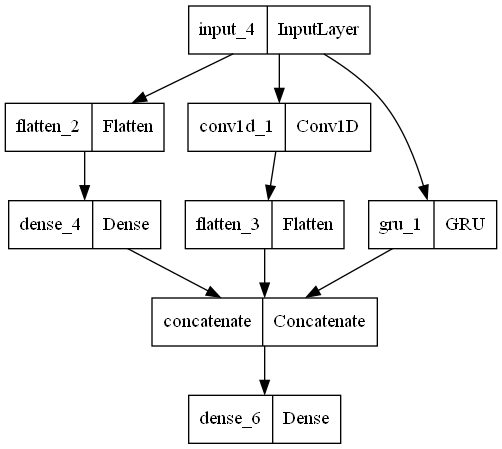

In [24]:
inputs = layers.Input(shape=(window, data.shape[-1]))

# Dense layers
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation = "relu")(x)

# Conv1D layers
y = layers.Conv1D(8, 4, activation="relu")(inputs)
y = layers.Flatten()(y)

# GRU layers
z = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(z)

features = layers.Concatenate(axis=-1)([x,y,z])

outputs = layers.Dense(1)(features)

model_advanced = keras.Model(inputs, outputs)
keras.utils.plot_model(model_advanced, "model_advanced.png")

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_advanced.keras", save_best_only = True)
]
model_advanced.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

history_advanced = model_advanced.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/20
388/388 [==============================] - 6s 14ms/step - loss: 21.7195 - mae: 3.4540 - val_loss: 13.7358 - val_mae: 2.9321
Epoch 2/20
388/388 [==============================] - 5s 14ms/step - loss: 9.9285 - mae: 2.4605 - val_loss: 12.3949 - val_mae: 2.7750
Epoch 3/20
388/388 [==============================] - 5s 13ms/step - loss: 9.0270 - mae: 2.3430 - val_loss: 12.0169 - val_mae: 2.7353
Epoch 4/20
388/388 [==============================] - 5s 13ms/step - loss: 8.4373 - mae: 2.2598 - val_loss: 12.2273 - val_mae: 2.7670
Epoch 5/20
388/388 [==============================] - 5s 13ms/step - loss: 8.0951 - mae: 2.2102 - val_loss: 12.0323 - val_mae: 2.7301
Epoch 6/20
388/388 [==============================] - 5s 14ms/step - loss: 7.8100 - mae: 2.1717 - val_loss: 12.1724 - val_mae: 2.7522
Epoch 7/20
388/388 [==============================] - 5s 13ms/step - loss: 7.5650 - mae: 2.1399 - val_loss: 12.1120 - val_mae: 2.7468
Epoch 8/20
388/388 [==============================] - 5s 13ms

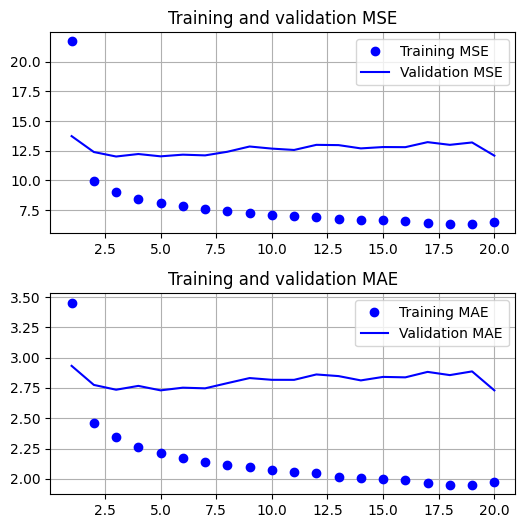

In [26]:
plot_history(history_advanced)

In [27]:
best_score_advanced = min(history_advanced.history['val_mae'])
print("best validation MAE score: ", best_score_advanced)

# load pretrained model
loaded_model_advanced = keras.models.load_model("jena_advanced.keras")

# evaluate loaded model
best_test_score_advanced = loaded_model_advanced.evaluate(test_dataset)[1]
print("best test MAE score: ", best_test_score_advanced)

# comparing model performance with common sense model
improvement_advanced = ((test_score_common_sense - best_test_score_advanced)/test_score_common_sense)*100
print(f"Improvement_advanced = {improvement_advanced:.2f} %")

best validation MAE score:  2.730055332183838
190/190 [==============================] - 2s 7ms/step - loss: 9.1636 - mae: 2.3988
best test MAE score:  2.398766040802002
Improvement_advanced = 2.49 %


#### 1.4.6.2  Advanced Complex Model Development and Evaluation 

The simple seemed slightly overfitted the data. As below, we will develop a more complex model by increasing the layers of dense, conv1D, and GRU branches. We will evaluate how the more complex model could overfit the data and use such knowledge to develop the optimal model.

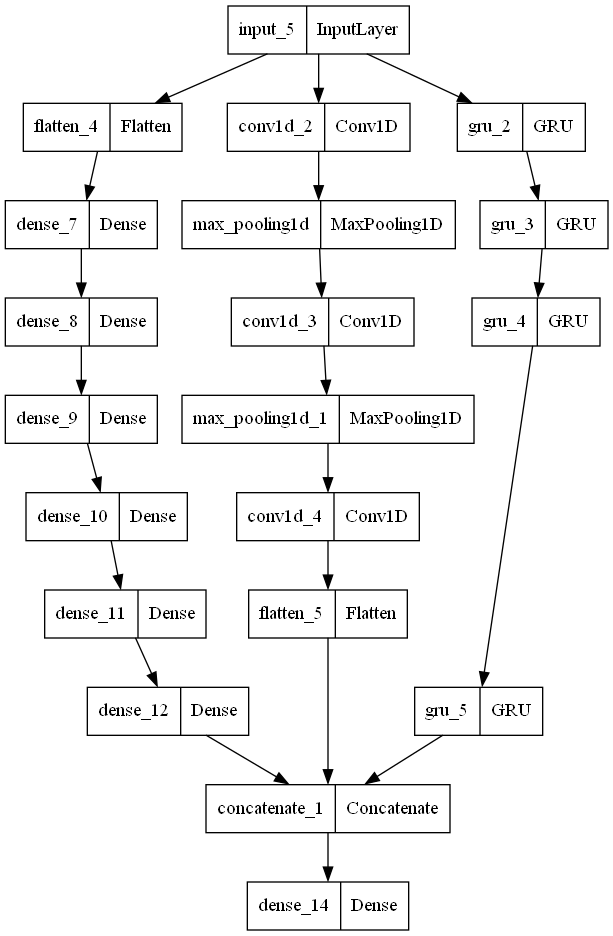

In [28]:
inputs = layers.Input(shape=(window, data.shape[-1]))

# Dense layers
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(32, activation = "relu")(x)
x = layers.Dense(32, activation = "relu")(x)
x = layers.Dense(16, activation = "relu")(x)
x = layers.Dense(16, activation = "relu")(x)

# Conv1D layers
y = layers.Conv1D(64, 2, activation="relu")(inputs)
y = layers.MaxPooling1D(pool_size=2)(y)
y = layers.Conv1D(32, 2, activation="relu")(y)
y = layers.MaxPooling1D(pool_size=2)(y)
y = layers.Conv1D(32, 2, activation="relu")(y)
y = layers.Flatten()(y)

# GRU layers
z = layers.GRU(64,return_sequences=True)(inputs)
z = layers.GRU(64,return_sequences=True)(z)
z = layers.GRU(32,return_sequences=True)(z)
z = layers.GRU(32,return_sequences=False)(z)
outputs = layers.Dense(1)(z)

features = layers.Concatenate(axis=-1)([x,y,z])

outputs = layers.Dense(1)(features)

model_advanced_complex = keras.Model(inputs, outputs)
keras.utils.plot_model(model_advanced_complex, "model_advanced_complex.png")

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_advanced_complex.keras", save_best_only = True)
]
model_advanced_complex.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

history_advanced_complex = model_advanced_complex.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/20
388/388 [==============================] - 18s 40ms/step - loss: 18.3875 - mae: 3.1256 - val_loss: 12.1108 - val_mae: 2.7559
Epoch 2/20
388/388 [==============================] - 15s 38ms/step - loss: 8.2567 - mae: 2.2340 - val_loss: 11.5808 - val_mae: 2.6859
Epoch 3/20
388/388 [==============================] - 15s 38ms/step - loss: 7.1174 - mae: 2.0767 - val_loss: 11.8742 - val_mae: 2.7503
Epoch 4/20
388/388 [==============================] - 15s 38ms/step - loss: 5.8435 - mae: 1.8769 - val_loss: 13.0016 - val_mae: 2.8857
Epoch 5/20
388/388 [==============================] - 15s 38ms/step - loss: 4.0109 - mae: 1.5487 - val_loss: 15.2471 - val_mae: 3.1427
Epoch 6/20
388/388 [==============================] - 15s 38ms/step - loss: 2.8334 - mae: 1.2947 - val_loss: 15.9657 - val_mae: 3.2025
Epoch 7/20
388/388 [==============================] - 15s 38ms/step - loss: 2.0995 - mae: 1.1158 - val_loss: 16.2301 - val_mae: 3.2207
Epoch 8/20
388/388 [==============================] - 

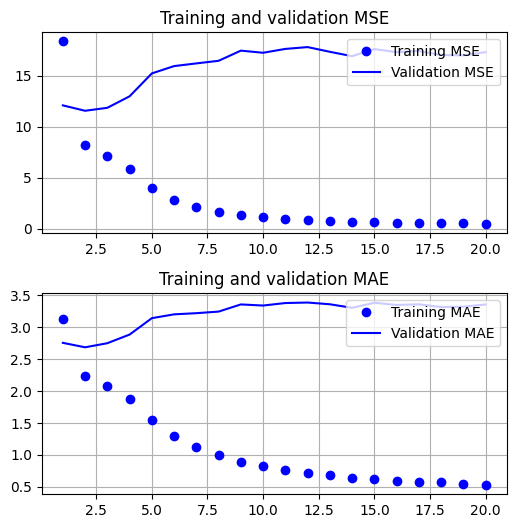

In [30]:
plot_history(history_advanced_complex)

In [31]:
best_score_advanced_complex = min(history_advanced_complex.history['val_mae'])
print("best validation MAE score: ", best_score_advanced_complex)

# load pretrained model
loaded_model_advanced_complex = keras.models.load_model("jena_advanced_complex.keras")

# evaluate loaded model
best_test_score_advanced_complex = loaded_model_advanced_complex.evaluate(test_dataset)[1]
print("best test MAE score: ", best_test_score_advanced_complex)

# comparing model performance with common sense model
improvement_advanced_complex = ((test_score_common_sense - best_test_score_advanced_complex)/test_score_common_sense)*100
print(f"Improvement_advanced = {improvement_advanced_complex:.2f} %")

best validation MAE score:  2.685920000076294
190/190 [==============================] - 4s 16ms/step - loss: 9.2704 - mae: 2.4280
best test MAE score:  2.4279627799987793
Improvement_advanced = 1.31 %


The complex model overfits data fast. Unfortunately, the performance drops.

### 1.4.7 Hyperparameter tuning



Referring to each model's performance plots above, we found that the validation MAE starts to plateau during the training of simple models from dense, Conv1D, or GRU layers. We are unsure if these models are capable enough to learn patterns in data. These simple models outperformed the common sense model. They learned information from the dataset. In contrast, the simple advanced model slightly overfits the dataset during training. Furthermore, the more complex advanced model overfits very quickly in the first few training epochs. These observations indicated that we could define a small hyperparameter space to search for the optimal model.

To prevent overfitting in our models defined in hyperparameter space, we will use dropout regularization. Dropout works by randomly masking out some neurons in the network, forcing the remaining neurons to account for prediction. In such a way, dropout could prevent the neuron network from being overly dependent on some neurons and force the neuron network to learn better, and reduces overfitting. 



In [32]:
inputs = layers.Input(shape=(window, data.shape[-1]))

In [33]:
# define a hyper model
def hyp_model(hp): 
    """
    Builds models based on instances of HyperParameters object 
    and defined hyperparameter space.
    
    Parameters
    ----------
    hp : HyperParameter object
    
    Returns
    -------
    model : keras model
            neuron network models built on HyperParameter object instances. 
    """
   
    # Dense layers features
    dense_layers = hp.Int("dense_layers", min_value = 1, max_value = 4, step = 1)
    dropout = hp.Boolean("dropout")
    dense_feats = hp.Boolean("dense_feats")
    
    # Dense layers models
    d = layers.Flatten()(inputs)
    if dense_feats:
        for i in range(dense_layers):
            d = layers.Dense(units=hp.Int('neurons_dense_layer_'+str(i), min_value =2 , max_value = 128, step = 16), 
                    activation=hp.Choice("activation", ["relu", "tanh"]))(d)
            if dropout:
                d = layers.Dropout(hp.Float("dropout_dense_layer_"+str(i+1), 0.1, 0.8, sampling='log'))(d)

    
    # Conv1d features:
    conv_layers = hp.Int("conv_layers", min_value = 1, max_value = 4, step = 1)
    filters = hp.Int("filters", min_value = 1, max_value = 50, step = 5) 
    kernel_size = hp.Int("kernel_size", min_value = 2, max_value = 7, step = 1)
    conv_feats = hp.Boolean("con_feats")
    
    # conv1D models
    conv = inputs
    if conv_feats:
        for i in range(conv_layers):
            if conv.shape[1]-kernel_size+1>0:
                conv = layers.Conv1D(filters=filters,
                                     kernel_size=kernel_size,
                                     activation=hp.Choice("activation", ["relu", "tanh"]))(conv)
            else:
                break
    conv = layers.Flatten()(conv)
    
    
    
    # GRU features
    GRU_layers = hp.Int("GRU_layers", min_value = 1, max_value = 4, step = 1)
    GRU_feats = hp.Boolean("GRU_feats")
    
    GRU = inputs
    if GRU_feats:
        for i in range(GRU_layers):
            GRU = layers.GRU(
                             units=hp.Int('neurons_GRU_layer_'+str(i), min_value =2 , max_value = 128, step = 16),
                             activation=hp.Choice("activation", ["relu", "tanh"]), 
                             return_sequences=True, 
                             recurrent_dropout=hp.Float("dropout_GRU_layer_"+str(i), 0.1, 0.8, sampling='log'))(GRU)
    GRU = layers.Flatten()(GRU)
    
    
    
    features = layers.Concatenate(axis=-1)([d, conv, GRU])
    
    # classifier
    regress_layers = hp.Int("regress_layers", min_value = 1, max_value = 4, step = 1)
    any_regressors = hp.Boolean("GRU_feats")
    
    if any_regressors:
        for i in range(regress_layers):
            features = layers.Dense(units=hp.Int('neurons_regress_layer_'+str(i), min_value =2 , max_value = 128, step = 16), 
                    activation=hp.Choice("activation", ["relu", "tanh"]))(features)
            features = layers.Dropout(hp.Float("dropout_regress_layer_"+str(i), 0.1, 0.8, sampling='log'))(features)
    
    outputs = layers.Dense(1)(features)
    model = keras.Model(inputs, outputs)

    # optimisation
    lr = hp.Float("lr", min_value = 1e-4, max_value = 1e-1, sampling = "log")
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
             loss = tf.keras.losses.MeanSquaredError(),
             metrics = [tf.keras.metrics.MeanAbsoluteError()])
    
    return model

In [34]:
# instantiate BayesianOptimiser tuner
tuner = kt.BayesianOptimization(
    hypermodel = hyp_model, # The models built on HyperParameter object instances
    objective = kt.Objective("val_loss", direction="min"), # The name of the objective to optimize
    max_trials = 10,    
    overwrite = True, # Overwrite the previous results
    directory = "my_dir", # folder name under current working directory to store the serach result
    project_name = "Apple_BayesianOptimization", # Name of the sub-directory in the directory
)

In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
dense_feats (Boolean)
{'default': False, 'conditions': []}
conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 50, 'step': 5, 'sampling': 'linear'}
kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 7, 'step': 1, 'sampling': 'linear'}
con_feats (Boolean)
{'default': False, 'conditions': []}
GRU_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
GRU_feats (Boolean)
{'default': False, 'conditions': []}
regress_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
lr (Flo

#### 1.4.7.1 Searching hyperparameter space

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
EARLY_STOPPING_PATIENCE = 5
MAX_EPOCHS = 100

es = EarlyStopping(
    monitor = "val_loss",
    patience = EARLY_STOPPING_PATIENCE,
    restore_best_weights = True
    )

In [38]:
tuner.search(
    train_dataset, 
    epochs = MAX_EPOCHS,
    callbacks = [es], 
    validation_data = val_dataset
    )

Trial 10 Complete [00h 35m 30s]
val_loss: 15.456408500671387

Best val_loss So Far: 11.606744766235352
Total elapsed time: 11h 43m 38s
INFO:tensorflow:Oracle triggered exit


In [39]:
tuner.results_summary()  

Results summary
Results in my_dir\Apple_BayesianOptimization
Showing 10 best trials
Trial summary
Hyperparameters:
dense_layers: 1
dropout: True
dense_feats: True
conv_layers: 1
filters: 21
kernel_size: 7
con_feats: True
GRU_layers: 2
GRU_feats: False
regress_layers: 1
lr: 0.007526225036279279
neurons_dense_layer_0: 34
activation: tanh
neurons_dense_layer_1: 82
neurons_dense_layer_2: 34
neurons_dense_layer_3: 34
neurons_GRU_layer_0: 66
dropout_GRU_layer_0: 0.45275897450019065
neurons_GRU_layer_1: 18
dropout_GRU_layer_1: 0.4147894691359679
neurons_regress_layer_0: 66
dropout_regress_layer_0: 0.6711714427784999
neurons_regress_layer_1: 50
dropout_regress_layer_1: 0.109812009961701
neurons_regress_layer_2: 66
dropout_regress_layer_2: 0.7000627167253778
dropout_dense_layer_1: 0.5539154108738856
dropout_dense_layer_2: 0.6026768896925963
neurons_GRU_layer_2: 114
dropout_GRU_layer_2: 0.10242166376947598
neurons_GRU_layer_3: 66
dropout_GRU_layer_3: 0.5691582016580704
Score: 11.606744766235352


In [40]:
# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'dense_layers': 1, 'dropout': True, 'dense_feats': True, 'conv_layers': 1, 'filters': 21, 'kernel_size': 7, 'con_feats': True, 'GRU_layers': 2, 'GRU_feats': False, 'regress_layers': 1, 'lr': 0.007526225036279279, 'neurons_dense_layer_0': 34, 'activation': 'tanh', 'neurons_dense_layer_1': 82, 'neurons_dense_layer_2': 34, 'neurons_dense_layer_3': 34, 'neurons_GRU_layer_0': 66, 'dropout_GRU_layer_0': 0.45275897450019065, 'neurons_GRU_layer_1': 18, 'dropout_GRU_layer_1': 0.4147894691359679, 'neurons_regress_layer_0': 66, 'dropout_regress_layer_0': 0.6711714427784999, 'neurons_regress_layer_1': 50, 'dropout_regress_layer_1': 0.109812009961701, 'neurons_regress_layer_2': 66, 'dropout_regress_layer_2': 0.7000627167253778, 'dropout_dense_layer_1': 0.5539154108738856, 'dropout_dense_layer_2': 0.6026768896925963, 'neurons_GRU_layer_2': 114, 'dropout_GRU_layer_2': 0.10242166376947598, 'neurons_GRU_layer_3': 66, 'dropout_GRU_layer_3': 0.5691582016580704}


### 1.4.8 Build the final model with optimal hyper parameters 

With hyperparameter tuning, we found a hyperparameter set that extracted more information than other sets. Following this, we will build a model with such a hyperparameter set and find the model's optimal epochs for this dataset. Lastly, we will train the optimal model on the dataset combining training dataset and validation dataset, and evaluate the trained model on the unseen test dataset.

#### 1.4.8.1  Build the final model with optimum hyperparameters and epochs

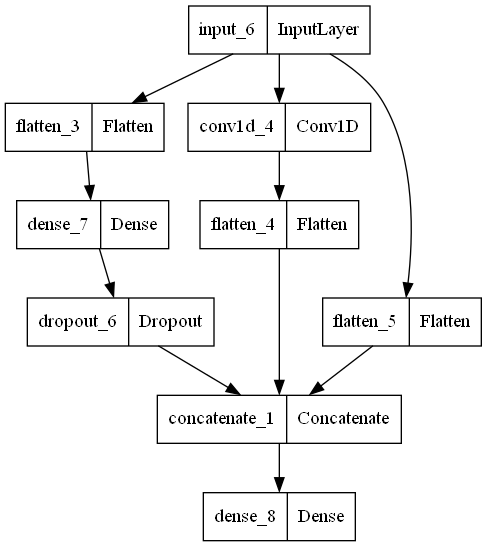

In [41]:
final_model = tuner.hypermodel.build(best_hps)
keras.utils.plot_model(final_model, "final_model.png")

In [42]:
# find the optimum epochs for the final model

# when minimum val_loss found, continue to train 20 more epochs and stop if no lower val_loss exists
es = EarlyStopping( monitor = "val_loss",
                    patience = 5,
                    restore_best_weights = True)

final_model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

history_final = final_model.fit(train_dataset,
                                epochs=100,
                                validation_data=val_dataset,
                                callbacks=es)

Epoch 1/100
388/388 [==============================] - 5s 12ms/step - loss: 16.5603 - mae: 3.0908 - val_loss: 14.1574 - val_mae: 2.9830
Epoch 2/100
388/388 [==============================] - 5s 12ms/step - loss: 10.4469 - mae: 2.5144 - val_loss: 13.0135 - val_mae: 2.8471
Epoch 3/100
388/388 [==============================] - 5s 12ms/step - loss: 9.6769 - mae: 2.4200 - val_loss: 12.4384 - val_mae: 2.7924
Epoch 4/100
388/388 [==============================] - 5s 12ms/step - loss: 9.1936 - mae: 2.3572 - val_loss: 11.8713 - val_mae: 2.7158
Epoch 5/100
388/388 [==============================] - 5s 13ms/step - loss: 8.9102 - mae: 2.3188 - val_loss: 11.9324 - val_mae: 2.7189
Epoch 6/100
388/388 [==============================] - 5s 12ms/step - loss: 8.6962 - mae: 2.2876 - val_loss: 11.8414 - val_mae: 2.7259
Epoch 7/100
388/388 [==============================] - 5s 13ms/step - loss: 8.4813 - mae: 2.2574 - val_loss: 11.5933 - val_mae: 2.6796
Epoch 8/100
388/388 [==============================] 

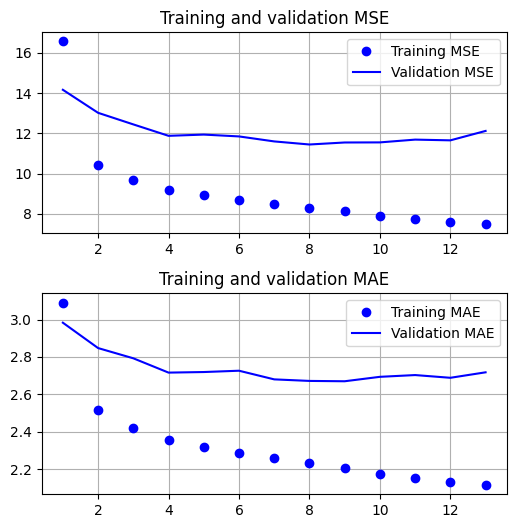

In [47]:
plot_history(history_final)

In [43]:
best_score_final = min(history_final.history['val_mae'])
print("best validation MAE score: ", best_score_final)

# pull out the optimum epochs
epochs = np.argmin(history_final.history['val_loss']) + 1

# train the final model on the dataset consist of train_dataset and val_dataset
final_model_history = final_model.fit(train_dataset.concatenate(val_dataset), epochs=epochs)

# save the final model
final_model.save("final_model.keras")

best validation MAE score:  2.669529438018799
Epoch 1/8
581/581 [==============================] - 5s 9ms/step - loss: 8.9694 - mae: 2.3325
Epoch 2/8
581/581 [==============================] - 5s 9ms/step - loss: 8.8259 - mae: 2.3122
Epoch 3/8
581/581 [==============================] - 5s 9ms/step - loss: 8.6233 - mae: 2.2842
Epoch 4/8
581/581 [==============================] - 5s 9ms/step - loss: 8.5074 - mae: 2.2679
Epoch 5/8
581/581 [==============================] - 5s 9ms/step - loss: 8.3995 - mae: 2.2540
Epoch 6/8
581/581 [==============================] - 5s 9ms/step - loss: 8.2627 - mae: 2.2356
Epoch 7/8
581/581 [==============================] - 5s 9ms/step - loss: 8.2114 - mae: 2.2287
Epoch 8/8
581/581 [==============================] - 5s 9ms/step - loss: 8.0597 - mae: 2.2083


In [44]:
# final model performance on test dataset
best_test_score_final = final_model.evaluate(test_dataset)[1]
print("best test MAE score: ", best_test_score_final)

improvement_final = ((test_score_common_sense - best_test_score_final)/test_score_common_sense)*100
print(f"Improvement_final = {improvement_final:.2f} %")

# predict the test dataset's Close price 
final_pred = final_model.predict(test_dataset).squeeze()

190/190 [==============================] - 1s 7ms/step - loss: 9.3544 - mae: 2.3955
best test MAE score:  2.3954904079437256
Improvement_final = 2.63 %
190/190 [==============================] - 1s 7ms/step


## 1.5 Results

In [45]:
test_MAE_dict = {'test_score_common_sense':test_score_common_sense, 
            'best_test_score_1D':best_test_score_1D,
            'best_test_score_GRU':best_test_score_GRU,
            'best_test_score_advanced': best_test_score_advanced,
            'best_test_score_advanced_complex':best_test_score_advanced_complex,
            'best_test_score_final':best_test_score_final           
           }

In [46]:
test_MAE = pd.DataFrame(test_MAE_dict, index=['MAE']).T

# improvement comparing to baseline model
test_MAE['improvement_vs_baseline'] =((test_score_common_sense - test_MAE['MAE'])/test_score_common_sense *100).apply(lambda x: f'{x:.2f}%')

test_MAE

,MAE,improvement_vs_baseline
test_score_common_sense,2.460117,0.00%
best_test_score_1D,2.391618,2.78%
best_test_score_GRU,2.369632,3.68%
best_test_score_advanced,2.398766,2.49%
best_test_score_advanced_complex,2.427963,1.31%
best_test_score_final,2.395490,2.63%


As shown above, our final optimal model could not beat the single GRU layer model, which performed best of all models. Furthermore, the single GRU layer model validation MAE score flattened out in the later epochs, indicating more layers could be added for higher prediction accuracy. However, our final optimal model did not select GRU layers in the architecture. Therefore, exploring the GRU sequential model for better prediction is worth our effort.

We built single-layer dense, conv1D, or GRU models. The simple GRU model outperformed the simple conv1D model, which performed better than the simple dense model. A simple dense layer flattens out the temporal information. However, it captures linear relationships and has statistical power. The simple conv1D model can capture the local temporal information, which could be more informative to temperature prediction. The GRU model can capture input sequence information which could contribute to better performance. Our simple models outperformed the common sense model, demonstrating that our data is informative.
Additionally, we found that both the simple advanced model and the complex advanced model overfitted during the training and underperformed compared to the simple GRU model. The fast overfitted complex model performed worst among all models. These results suggest that we are possible to find the optimal model with a small architecture.

The final model showed worse results than the single GRU layer model. The reasons could be as follows:
1. The hyperparameter space is too small. Hence the optimal model falls outside the hyperparameter space.
2. There are not enough trials for the Keras tuner to find a better solution. As the Bayesian optimization tuner uses a scholastic approach to search optimal hyperparameters, we may need more experiments to find an optimal solution.
3. The slice of the dataset is too small. The optimal model may miss out on information due to their rareness. Such information could be outstanding from noise when there is more data.


## 1.6 Conclusion

At the start of the project, we defined our aims and objectives. We have fulfilled our aims and objectives.

We aimed to find an optimal neuron network model to predict temperature accurately based on the Jena weather dataset. We built and evaluated three simple models, including single-layer dense, single-layer conv1D, or single-layer GRU. These simple models outperformed the common sense model demonstrating the informativeness of our data. The performance of these three models on predicting temperature on the test dataset indicated that single-layer GRU is the most informative model while single-layer dense is the least informative model.

We found that the advanced models could not beat the single-layer GRU model. Both the simple advanced model and the more complex advanced model suffered from overfitting. Hence, the less complicated advanced model may provide optimal performance. Therefore, we defined a small hyperparameter space, also due to limited computational resources. However, the searched optimal model showed worse performance than the single-layer GRU model, which could be due to the small size of dataset.

Despite this, our study showed approaches to develop an optimal model, and our findings are meaningful in giving direction in developing neuron network models which could predict time-series temperature data.

Limited by computational resources and time, we are not able to model the whole dataset. By training the model on more data, we are able to find more information in data and improve overfitting and our model performance.

In the future, we could allocate more computational resources and time to develop models based on the whole dataset to improve performance. Alternatively, we could explore neuron network structure using the sequence of GRU layers instead of leveraging multiple branches consisting of dense layers, and convolutional 1D layers as our single-layer GRU model outperformed all other models in our experiments.

Overall, our project showed how neuron networks could be applied to time-series data prediction problems.

## 1.7 References


Chollet, F. (2021) *Deep learning with Python*. 2nd edition. Shelter Island, NY: Manning Publications

